In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load 20 years of U.S unemployment data (obtained from https://fred.stlouisfed.org/series/UNRATE)
# NB: data frequency on load is beginning of each month
ue_data = pd.read_csv('data/unemployment.csv', parse_dates=['DATE'], index_col='DATE')
ue_data

,UNRATE
DATE,
2002-02-01,5.7
2002-03-01,5.7
2002-04-01,5.9
2002-05-01,5.8
2002-06-01,5.8
...,...
2021-10-01,4.6
2021-11-01,4.2
2021-12-01,3.9


In [3]:
ue_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2002-02-01 to 2022-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [4]:

# check for missing values
ue_data.isnull().sum()

UNRATE    0
dtype: int64

In [5]:

# Check ffill
print(ue_data.asfreq('W', method='ffill').head())

            UNRATE
DATE              
2002-02-03     5.7
2002-02-10     5.7
2002-02-17     5.7
2002-02-24     5.7
2002-03-03     5.7


In [6]:

# Check bfill
print(ue_data.asfreq('W', method='bfill').head())

            UNRATE
DATE              
2002-02-03     5.7
2002-02-10     5.7
2002-02-17     5.7
2002-02-24     5.7
2002-03-03     5.9


In [7]:

# Upsample ue_data to weekly frequency and forward fill
ue_data_ffill = ue_data.asfreq('W', method='ffill')
ue_data_ffill.head(20)

,UNRATE
DATE,
2002-02-03,5.7
2002-02-10,5.7
2002-02-17,5.7
2002-02-24,5.7
2002-03-03,5.7
2002-03-10,5.7
2002-03-17,5.7
2002-03-24,5.7
2002-03-31,5.7


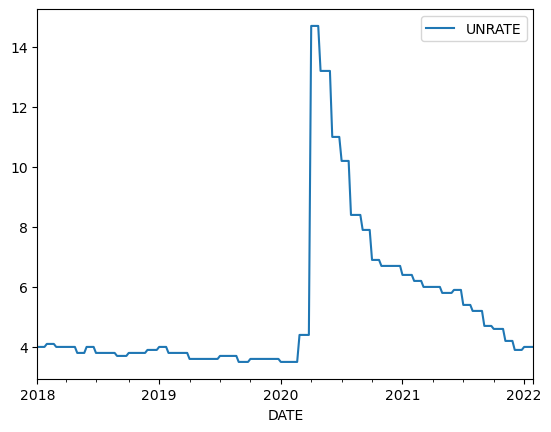

In [8]:

# Plot ffilled weekly unemployment data from 2018 onwards
ue_data_ffill.loc['2018':].plot()
plt.show()